In [1]:
using Optics_in_the_length_gauge
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful
using Statistics
using Optics_in_the_length_gauge
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful
using Statistics
using StaticArrays
using Parameters
using CairoMakie
using LaTeXStrings
using LMC
using JLD2
using FileIO
# add https://github.com/fernandopenaranda/Optics_in_the_length_gauge
# units meV, fs, K
const kB = (PhysicalConstants.CODATA2018.k_B |> u"eV/K").val
const μB = (PhysicalConstants.CODATA2018.BohrMagneton |> u"eV/T").val
const ħ = PhysicalConstants.CODATA2018.ħ
const e = PhysicalConstants.CODATA2018.e
const C = ((e^3 / ħ^2) |> u"μA/V^2/s").val
const C_cd = ((e^2/ħ) |> u"μA/V").val
const ħ_ev_s = (ħ |> u"eV*s").val
const ang_to_m = 1e-10
const Kb_in_mev = 1e3* kB


proj_folder = dirname(pwd())
rhomb_folder = proj_folder * "/model/rhombohedral/"
common_folder = proj_folder * "/comfunctions/"
figures_folder = proj_folder * "/Paper/Figures/"

Loaded plotting extension


"/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figures/"

In [174]:

xx_drude_presets(N, μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T, τ = τ)
lmcnoshift_presets(N, μ, ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
    T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
    fermi_surface = false, with_shift = false)

function figure_RHG(p; kpoints = 10, fontsize = 10)
    
    
    fig = Figure(size = (600,600), figure_padding = (0,0,0,0))
    ax1 = Axis(fig[1,2], ylabel = L"$\text{E [meV]}$", xlabelsize = fontsize + 2, ylabelsize = fontsize +2)
    ax2 = Axis(fig[2,1], ylabel = L"$\text{E [meV]}$", xlabelsize = fontsize + 2, ylabelsize = fontsize +2)
    ax3 = Axis(fig[2,2], ylabel = L"$\text{E [meV]}$", xlabelsize = fontsize + 2, ylabelsize = fontsize +2)
    ax4 = Axis(fig[3,1], ylabel = L"$\text{E [meV]}$", xlabelsize = fontsize + 2, ylabelsize = fontsize +2)
    ax5 = Axis(fig[3,2], ylabel = L"$\text{E [meV]}$", xlabelsize = fontsize + 2, ylabelsize = fontsize +2)

    LMC.abcNplotbandsk(ax1, 3, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
    LMC.abcNplotbandsk(ax1, 3, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :black, linestyle = :dash)

    
    
    LMC.abcNplotbandsk(ax2, 4, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
    LMC.abcNplotbandsk(ax2, 4, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :black, linestyle = :dash)

    LMC.abcNplotbandsk(ax3, 5, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
    LMC.abcNplotbandsk(ax3, 5, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1],color = :black, linestyle = :dash)

    LMC.abcNplotbandsk(ax4, 6, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
    LMC.abcNplotbandsk(ax4, 6, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1],color = :black, linestyle = :dash)

    LMC.abcNplotbandsk(ax5, 7, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
    LMC.abcNplotbandsk(ax5, 7, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1],color = :black, linestyle = :dash)
    
    # ylims!(axbands, -0,8)
    # axbands.yticks = [0, 4, 8]
    μlist = [0.25,3,5]
    colorlist = [:cornflowerblue, :mediumpurple, :lightsalmon]
    [hlines!(ax5, μlist[i], color = colorlist[i]) for i in 1:length(μlist)]
    
    hidexdecorations!(ax1, grid = false)
    hidexdecorations!(ax2, grid = false)
    hidexdecorations!(ax3, grid = false)
    hideydecorations!(ax3, grid = false)
    hideydecorations!(ax5, grid = false)
    
    Label(fig[1, 2, Top()], L"$\mathrm{N} = 3$"; fontsize = fontsize+2, padding = (4, 0, -26, 0))
    Label(fig[2,1 , Top()], L"$\mathrm{N} = 4$"; fontsize = fontsize+2, padding = (4, 0, -26, 0))
    Label(fig[2, 2, Top()], L"$\mathrm{N} = 5$"; fontsize = fontsize+2, padding = (4, 0, -26, 0))
    Label(fig[3, 1, Top()], L"$\mathrm{N} = 6$"; fontsize = fontsize+2, padding = (4, 0, -26, 0))
    Label(fig[3, 2, Top()], L"$\mathrm{N} = 7$"; fontsize = fontsize+2, padding = (4, 0, -26, 0))
    xlims!(ax1, 30,370)
    xlims!(ax2, 30,370)
    xlims!(ax3, 30,370)
    xlims!(ax4, 30,370)
    xlims!(ax5, 30,370)

    Label(fig[1, 1, TopLeft()], "a)", fontsize = fontsize+1, padding = (0, -20, -25, 0), halign = :right)
    Label(fig[1, 2, TopLeft()], "b)", fontsize = fontsize+1, padding = (0, -20, -25, 0), halign = :right)
    Label(fig[2, 1, TopLeft()], "c)", fontsize = fontsize+1, padding = (0,  -20, -25, 0), halign = :right)
    Label(fig[2, 2, TopLeft()], "d)", fontsize = fontsize+1, padding = (0, -20, -30,0), halign = :right)
    Label(fig[3, 1, TopLeft()], "e)", fontsize = fontsize+1, padding = (0,  -15, -30, 0), halign = :right)
    Label(fig[3, 2, TopLeft()], "f)", fontsize = fontsize+1, padding = (0, -25, -30, 0), halign = :right)

    
    colgap!(fig.layout, -40)
    rowgap!(fig.layout, 10)
    fig
end

function lat_figure_RHG(p; kpoints = 10, fontsize = 10)
    with_theme(merge(theme_latexfonts(), Theme(fontsize = fontsize))) do #
        figure_RHG(p, kpoints = kpoints, fontsize = fontsize)     
    end
end
    


lat_figure_RHG (generic function with 1 method)

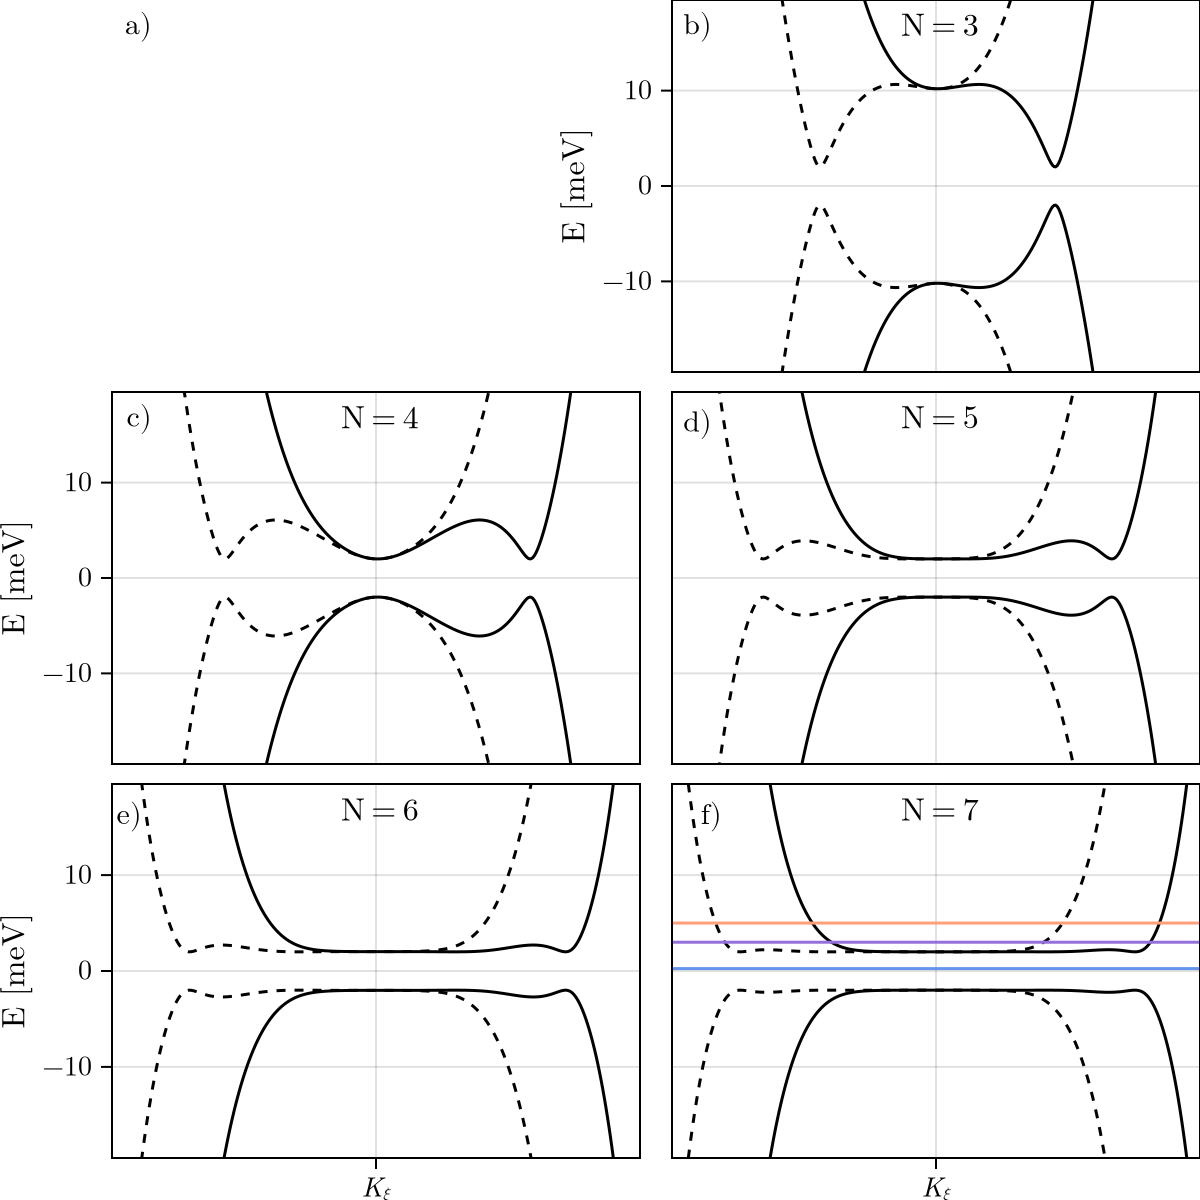

In [175]:
p = Params_rhombohedral(1, 0, 3160, 390,-20, 315, 0*44, 2, 0)
fig = lat_figure_RHG(p; kpoints = 200, fontsize = 14)

In [176]:
v = "v2"
save("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figures/Figure_bandsRHG$(v).pdf", fig)

CairoMakie.Screen{PDF}
